In [1032]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk
import joblib

In [1033]:
df = pd.read_csv('datasets\laptop_price.csv',encoding='latin')

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\avdhoot\AppData\Local\Temp\ipykernel_6008\1434213189.py:1: SyntaxWarning: invalid escape sequence '\l'
  df = pd.read_csv('datasets\laptop_price.csv',encoding='latin')


In [1034]:
df.duplicated().sum()

np.int64(0)

In [1035]:
df.drop(columns=['laptop_ID'],inplace=True)

In [1036]:
df.duplicated().sum()

np.int64(28)

In [1037]:
df = df.drop_duplicates()

In [1038]:
df.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [1039]:
df.shape

(1275, 12)

In [1040]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [1041]:
df['Price'] = round(df['Price_euros']*102.45).astype('int')
df.drop(columns=['Price_euros'],inplace=True)

In [1042]:
df.sample()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
14,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M m3 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,macOS,0.92kg,129333


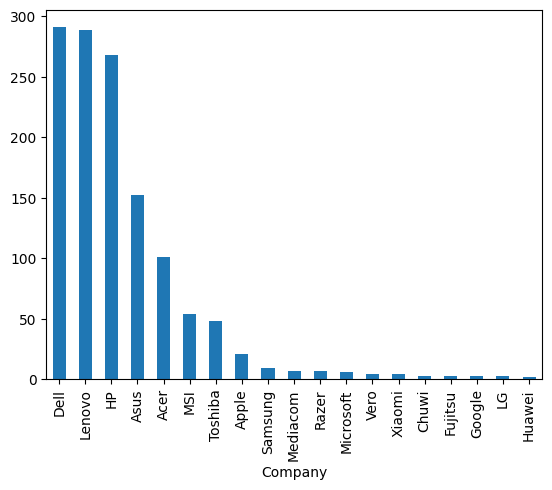

In [1043]:
# EDA
#  - Univeriate analysis 
#  - Multiveriate analysis

df['Company'].value_counts().plot(kind='bar')      # Univeriate analysis  just doing analysis on a singel cloumn
plt.show()

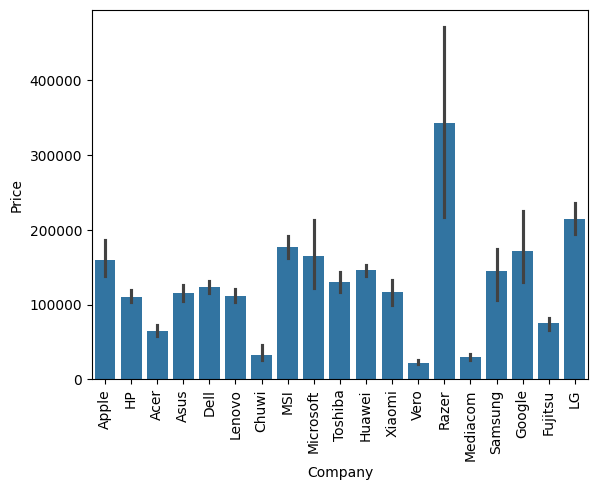

In [1044]:
sb.barplot(x=df['Company'], y= df['Price'])
plt.xticks(rotation= 90)
plt.show()

In [1045]:
df = df[df.groupby('Company').Company.transform('count')>10].copy()
df['Company'].value_counts()

Company
Dell       291
Lenovo     289
HP         268
Asus       152
Acer       101
MSI         54
Toshiba     48
Apple       21
Name: count, dtype: int64

<Axes: xlabel='Company'>

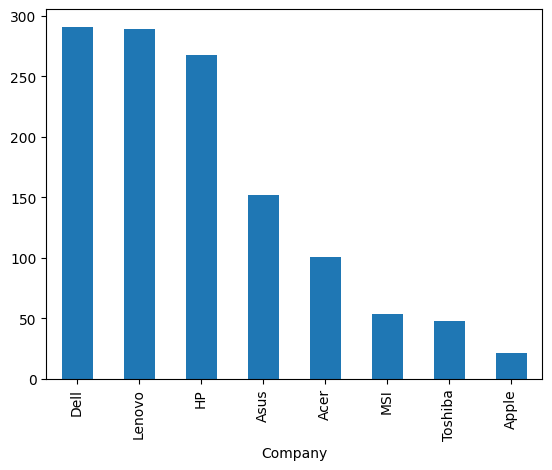

In [1046]:
df['Company'].value_counts().plot(kind='bar')

In [1047]:
df.sample()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
200,Dell,Inspiron 7577,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.65kg,189020


In [1048]:
df = df.drop(columns='Product')

<Axes: xlabel='TypeName'>

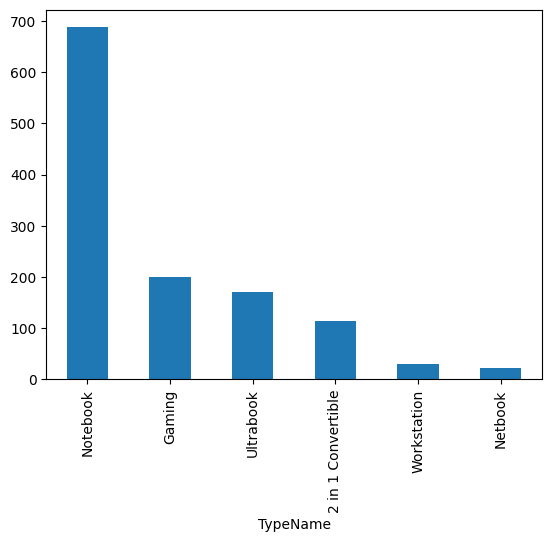

In [1049]:
df['TypeName'].value_counts().plot(kind='bar')

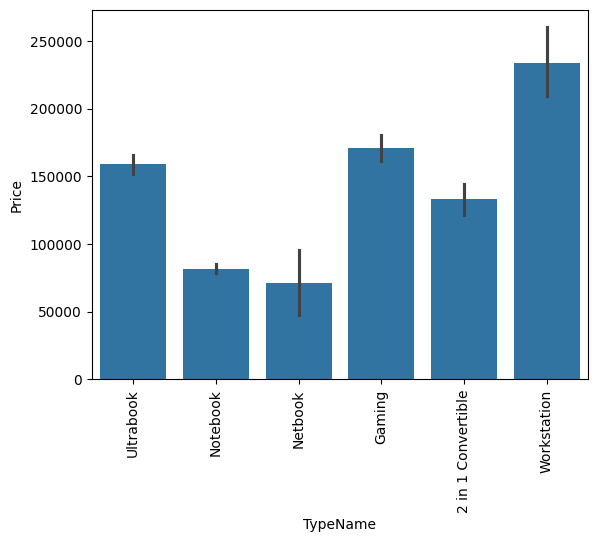

In [1050]:
sb.barplot(x=df['TypeName'], y= df['Price'])
plt.xticks(rotation= 90)
plt.show()

<Axes: xlabel='Inches'>

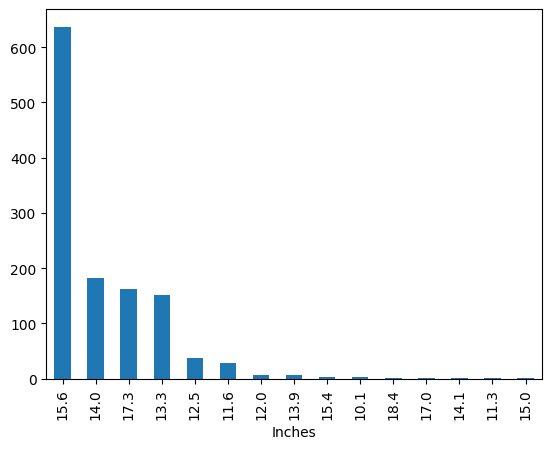

In [1051]:
df['Inches'].value_counts().plot(kind='bar')

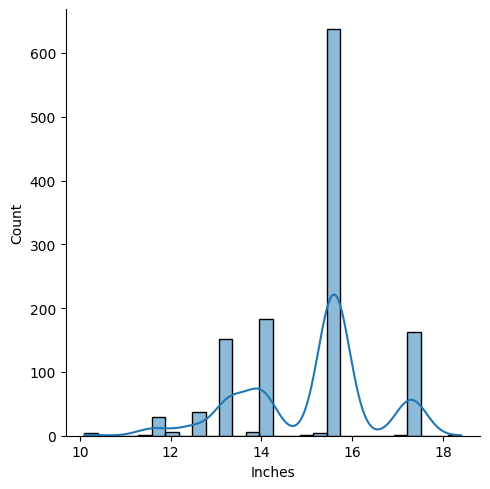

In [1052]:
sb.displot(x= df['Inches'],kde=True)

In [1053]:
df['ScreenResolution'].value_counts()
b = "IPS Panel Full HD / Touchscreen 1920x1080"
lambda b:b.split()(b).split('x')[0]

<function __main__.<lambda>(b)>

In [1054]:
df['X_res'] = df['ScreenResolution'].apply(lambda b:b.split()[-1].split('x')[0]).astype('int')
df['Y_res'] = df['ScreenResolution'].apply(lambda b:b.split()[-1].split('x')[1]).astype('int')

In [1055]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0).astype('int')
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0).astype('int')

In [1056]:
df.drop(columns='ScreenResolution',inplace=True)

In [1057]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
728,Dell,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,AMD Radeon R7 M445,Linux,2.32kg,60396,1366,768,0,0


In [1058]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz              183
Intel Core i7 7700HQ 2.8GHz             142
Intel Core i7 7500U 2.7GHz              124
Intel Core i5 8250U 1.6GHz               71
Intel Core i7 8550U 1.8GHz               71
                                       ... 
Intel Pentium Dual Core 4405Y 1.5GHz      1
Intel Core M 6Y54 1.1GHz                  1
AMD E-Series 9000 2.2GHz                  1
Intel Core M 6Y30 0.9GHz                  1
AMD A9-Series 9410 2.9GHz                 1
Name: count, Length: 111, dtype: int64

In [1059]:
df['Cpu'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [1060]:
df['Cpu'].value_counts()

Cpu
Intel Core i7               493
Intel Core i5               411
Intel Core i3               134
Intel Celeron Dual           66
Intel Pentium Quad           27
Intel Core M                 16
AMD A9-Series 9420           12
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Celeron Quad            5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A6-Series A6-9220         2
AMD A9-Series A9-9420         2
AMD A10-Series 9600P          2
AMD A10-Series A10-9620P      2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD E-Series 9000e            1
AMD E-Series E2-6110          1
AMD E-Series 6110             1
AMD FX 9830P                  1
Intel Atom x5-Z8350           1
AMD Ryzen 1600                1
AMD E-Series E2-9000          1
AMD A6-Series 7310            1
AMD 

In [1061]:
def series_of_Cpu(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3' or text== 'Intel Core M':
        return text
    elif text.split()[0]=="Intel":
        return " ".join(text.split()[0:2])
    else:
        return "AMD Processor"

In [1062]:
df['Cpu'] = df['Cpu'].apply(series_of_Cpu)

<Axes: xlabel='Cpu'>

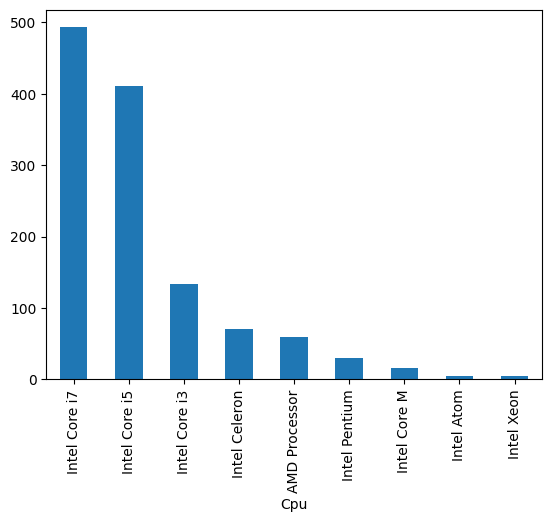

In [1063]:
df['Cpu'].value_counts().plot(kind='bar')

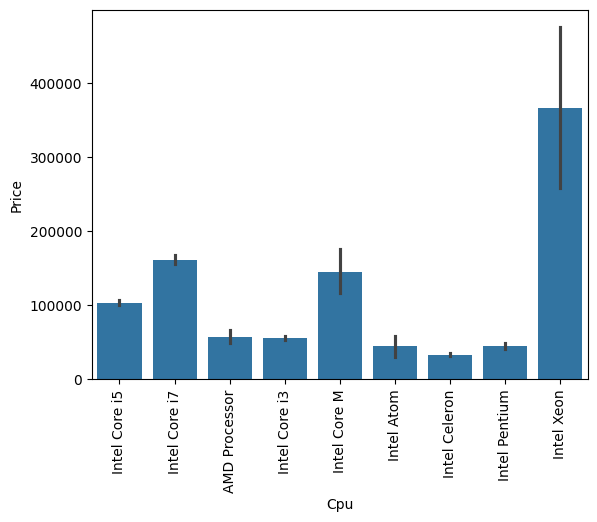

In [1064]:
sb.barplot(x=df['Cpu'], y=df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [1065]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
957,HP,2 in 1 Convertible,11.6,Intel Pentium,4GB,256GB SSD,Intel HD Graphics 505,Windows 10,1.45kg,79399,1366,768,1,0


In [1066]:
df['Ram'].value_counts()

Ram
8GB     595
4GB     351
16GB    186
6GB      34
12GB     25
32GB     15
2GB      14
24GB      3
64GB      1
Name: count, dtype: int64

In [1067]:
df['Ram'] = df['Ram'].apply(lambda x : x.replace('GB','')).astype('int')

<Axes: xlabel='Ram'>

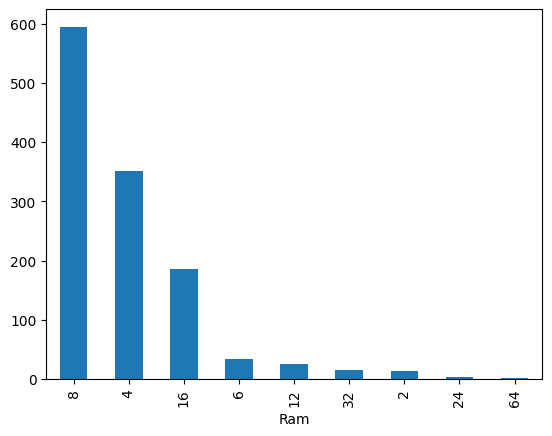

In [1068]:
df['Ram'].value_counts().plot(kind='bar')

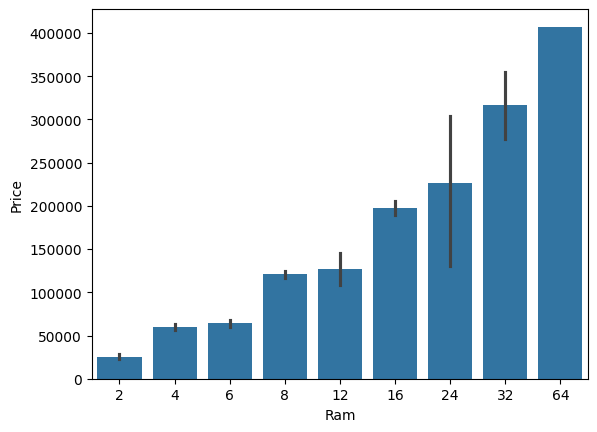

In [1069]:
sb.barplot(x=df['Ram'],y=df['Price'])
plt.xticks()
plt.show()

In [1070]:
df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory']=df['Memory'].str.replace('GB','')
df['Memory']=df['Memory'].str.replace('TB','000')

new=df['Memory'].str.split("+",n=1,expand=True)
df['first']=new[0]
df['first']=df['first'].str.strip()
df['second']=new[1]

df['Layer1HDD']=df['first'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer1SSD']=df['first'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer1Hybrid']=df['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage']=df['first'].apply(lambda x:1 if 'Flash Storage' in x else 0)

df['first']=df['first'].str.replace(r'\D','',regex=True)

df['second'].fillna("0",inplace=True)

df['Layer2HDD']=df['second'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer2SSD']=df['second'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer2Hybrid']=df['second'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage']=df['second'].apply(lambda x:1 if 'Flash Storage' in x else 0)

df['second']=df['second'].str.replace(r'\D','',regex=True)

df['first']=df['first'].astype('int')
df['second']=df['second'].astype('int')

df['HDD']=df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD']
df['SSD']=df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD']
df['Hybrid']=df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid']
df['Flash_Storage']=df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage']

df.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage',
                 'Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\avdhoot\AppData\Local\Temp\ipykernel_6008\665532818.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)
C:\Users\avdhoot\AppData\Local\Temp\ipykernel_6008\665532818.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['second'].fillna("0",inplace=True)


In [1071]:
df['Memory'].value_counts()

Memory
256 SSD                         393
1000 HDD                        215
500 HDD                         124
512 SSD                         105
128 SSD +  1000 HDD              93
256 SSD +  1000 HDD              73
128 SSD                          71
32 Flash Storage                 29
2000 HDD                         16
512 SSD +  1000 HDD              14
1000 SSD                         12
64 Flash Storage                 10
256 SSD +  2000 HDD              10
256 Flash Storage                 8
1000 Hybrid                       7
16 Flash Storage                  6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
256 SSD +  256 SSD                2
512 Flash Storage                 2
128 SSD +  2000 HDD               2
32 SSD                            2
256 SSD +  500 HDD                2
1000 SSD +  1000 HDD              2
64 SSD                            1
512 SSD +  256 SSD   

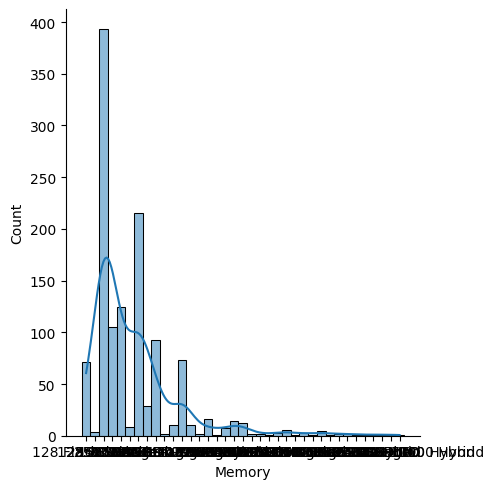

In [1072]:
sb.displot(x=df['Memory'],kde = True)

In [1073]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS,HDD,SSD,Hybrid,Flash_Storage
1069,Apple,Ultrabook,12.0,Intel Core M,8,256 Flash Storage,Intel HD Graphics 515,Mac OS X,0.920kg,133185,2304,1440,0,1,0,0,0,256


In [1074]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      265
Intel HD Graphics 520      179
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     65
Nvidia GeForce GTX 1060     45
                          ... 
AMD Radeon R5 M315           1
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
Name: count, Length: 108, dtype: int64

In [1075]:
df['OpSys'].value_counts()

OpSys
Windows 10      1011
No OS             63
Linux             58
Windows 7         45
Chrome OS         22
macOS             13
Mac OS X           8
Windows 10 S       2
Android            2
Name: count, dtype: int64

In [1076]:
def combined_OpSys(text):
    if text== "Windows 10" or text== "Windows 10 S":
        return "Windows 10"
    elif text== "Windows 7":
        return text
    else:
        return "linux/No OS/Other"

In [1077]:
df['OpSys'] = df['OpSys'].apply(combined_OpSys)

In [1078]:
df['OpSys'].value_counts()

OpSys
Windows 10           1013
linux/No OS/Other     166
Windows 7              45
Name: count, dtype: int64

<Axes: xlabel='OpSys'>

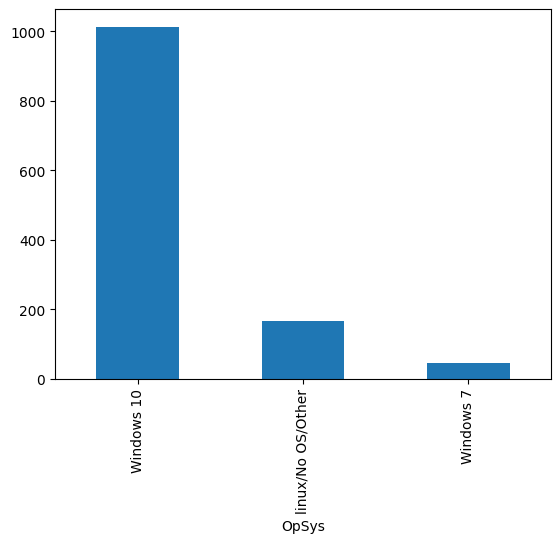

In [1079]:
df['OpSys'].value_counts().plot(kind='bar')


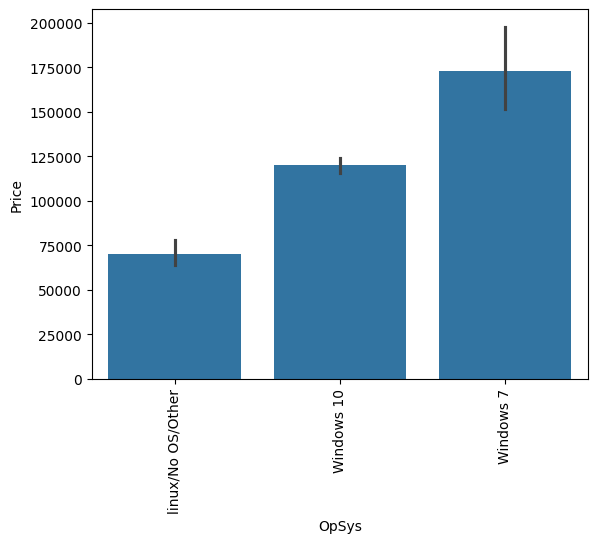

In [1080]:
sb.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [1081]:
df['Weight'].value_counts()

Weight
2.2kg      115
2.1kg       58
2.4kg       42
2.5kg       37
2.3kg       36
          ... 
2.21kg       1
2.191kg      1
1.08kg       1
2.34kg       1
4.0kg        1
Name: count, Length: 175, dtype: int64

In [1082]:
df['Weight'] = df['Weight'].apply(lambda x:x.replace('kg','')).astype('float')

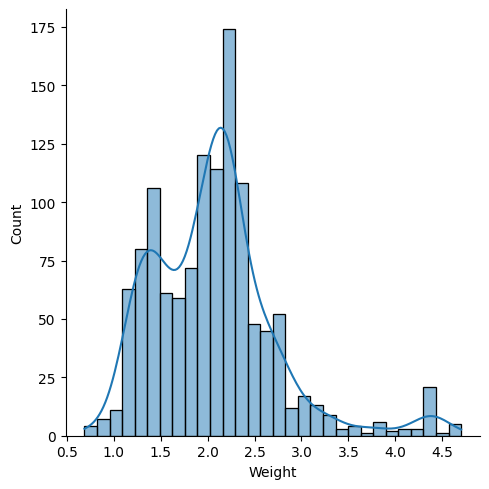

In [1083]:
sb.displot(x=df['Weight'],kde = True)

<Axes: xlabel='Weight', ylabel='Price'>

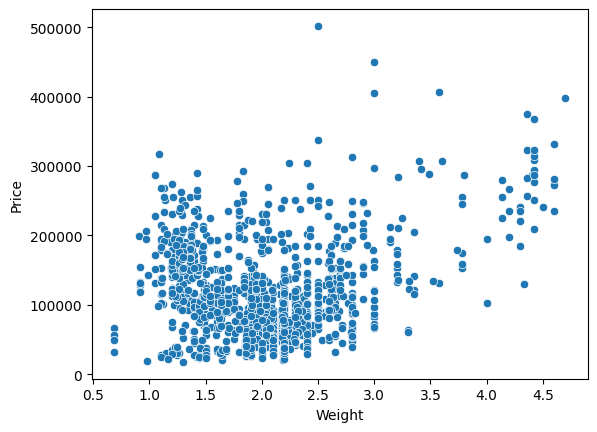

In [1084]:
sb.scatterplot(x=df['Weight'],y= df['Price'])

In [1085]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      265
Intel HD Graphics 520      179
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     65
Nvidia GeForce GTX 1060     45
                          ... 
AMD Radeon R5 M315           1
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
Name: count, Length: 108, dtype: int64

In [1086]:
df['Gpu'] = df['Gpu'].apply(lambda x:x.split()[0])

<Axes: xlabel='Gpu'>

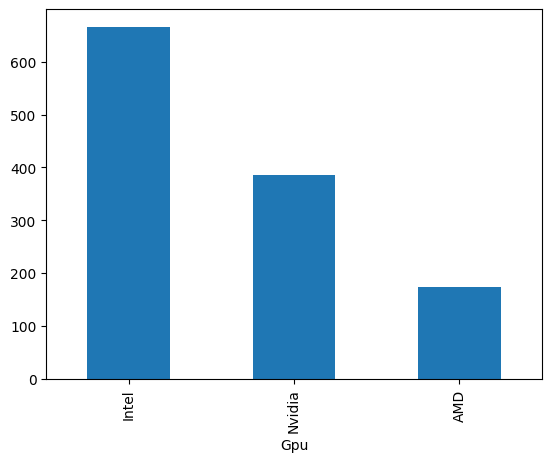

In [1087]:
df['Gpu'].value_counts().plot(kind='bar')

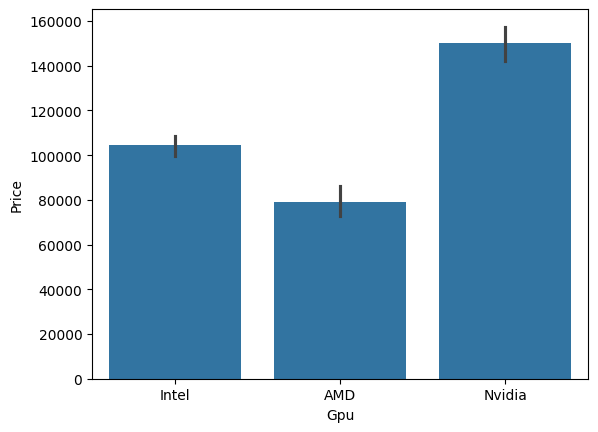

In [1088]:
sb.barplot(x=df['Gpu'], y= df['Price'])
plt.show()

In [1089]:
df.corr(numeric_only=True)['Price']

Inches           0.055330
Ram              0.726639
Weight           0.212038
Price            1.000000
X_res            0.553707
Y_res            0.552964
Touchscreen      0.161443
IPS              0.289225
HDD             -0.093770
SSD              0.654751
Hybrid           0.025523
Flash_Storage   -0.023384
Name: Price, dtype: float64

In [1090]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS,HDD,SSD,Hybrid,Flash_Storage
538,HP,Gaming,17.3,Intel Core i7,12,1000 HDD,Nvidia,Windows 10,2.62,184308,1920,1080,0,0,1000,0,0,0
511,Acer,Notebook,15.6,Intel Core i7,4,500 HDD,Nvidia,Windows 10,2.20,65466,1920,1080,0,0,500,0,0,0
1167,Lenovo,Notebook,15.6,Intel Core i3,4,1000 HDD,Nvidia,Windows 10,2.20,47947,1920,1080,0,0,1000,0,0,0
786,MSI,Gaming,15.6,Intel Core i5,8,128 SSD + 1000 HDD,Nvidia,Windows 10,2.20,111568,1920,1080,0,0,1000,128,0,0
1265,Lenovo,Notebook,15.6,Intel Core i7,8,1000 HDD,Nvidia,Windows 10,2.60,92103,1920,1080,0,1,1000,0,0,0


In [1091]:
df['PPI'] = round(((df['X_res'])**2 +(df['Y_res'])**2)**0.5 /df['Inches']).astype('int')

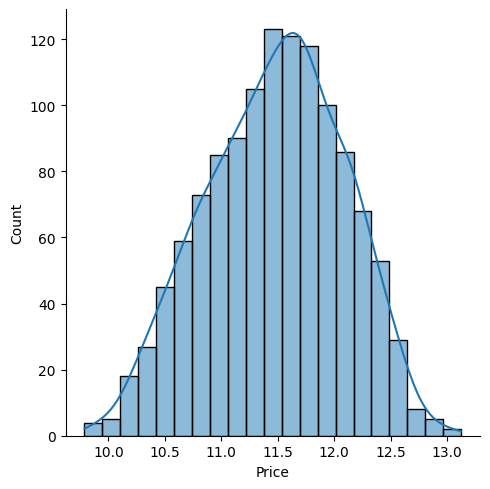

In [1092]:
sb.displot(x=np.log(df['Price']),kde = True)
plt.show()

In [1093]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS,HDD,SSD,Hybrid,Flash_Storage,PPI
451,Dell,Workstation,15.6,Intel Core i7,16,256 SSD,Nvidia,Windows 10,2.17,202339,1920,1080,0,1,0,256,0,0,141


In [1094]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [1095]:
X = df.drop(columns = ['Price'])
y = np.log(df['Price'])

In [1096]:
from sklearn.model_selection import train_test_split

In [1097]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [1098]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [1099]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor       

In [1102]:
X_test.sample()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Touchscreen,IPS,HDD,SSD,Hybrid,Flash_Storage,PPI
317,Lenovo,Notebook,Intel Celeron,4,16 Flash Storage,Intel,linux/No OS/Other,1.45,0,0,0,0,0,16,118


In [1101]:
# LinearRegression

step1 = ColumnTransformer(transformers=[
               ('Col_trf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5,6])
               ],remainder='passthrough')
step2 = LinearRegression()
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("r2_score",r2_score(y_test,y_pred))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))

r2_score 0.7924812832685544
mean_absolute_error 0.20065082934086667
mean_squared_error 0.06552309690439348
